In [232]:
import numpy as np
import pandas as pd
import random, math, copy


In [233]:
def load_files(directory):
    data_sets = []   
    os.chdir(r"{}".format(directory))
    files = os.listdir()
    for file in files:
        data = pd.read_csv(''.join(file))
        data_sets.append(data)
    os.chdir(r"..")
    return data_sets


In [234]:
data_sets = load_files('data')

In [235]:
def data_to_node(data_set):
    nodes = []
    for index, row in data_set.iterrows():
        nodes.append(np.array(row))
    return np.array(nodes)

In [236]:
node_sets = []
for ds in data_sets:
    node_sets.append(data_to_node(ds))

In [237]:
def gen_rand(length):
    n = random.randint(0,length)
    return n

def euclidean_distance(A, B):
    return math.sqrt(math.pow(A[0] - B[0],2) + math.pow(A[1] - B[1],2))

# calculate belonging rate of kth node to ith cluster
def cal_blng_r(Xk, Vi, c, m, centroid_nodes):
    distance_Xk_Vi = euclidean_distance(Xk, Vi)
    dis_sum, Uik = 0, 0
    for centroid_node in centroid_nodes:
        distance_Xk_Vj = euclidean_distance(Xk, centroid_node)
        if distance_Xk_Vj != 0:
            dis_sum += math.pow((distance_Xk_Vi/distance_Xk_Vj), 2/(m-1))
    if dis_sum != 0:
        Uik = 1/(dis_sum)
    return Uik

In [238]:
def update_centroid_node(i, node_set, belonging_rates, m):
    sum_top, sum_bottom = 0, 0
    #calc_weighted_avg
    for j in range(len(node_set)):
        sum_bottom += np.power(belonging_rates[j][i], m)
        sum_top += np.power(belonging_rates[j][i], m)*node_set[j]
    return sum_top/sum_bottom

In [239]:
%%time
node_set = node_sets[0]
belonging_rates_ks = []
k_pack = []
for k in range(1,6):
    m=2
    centroid_nodes = []
    belonging_rates = [0]*len(node_set)
    # set random centroid nodes
    for _ in range(k):
        n = gen_rand(len(node_set))
        centroid_nodes.append(node_set[n])
    # repeat 100 types
    for _ in range(100):
        # calculate belonging rates 
        for i in range(len(node_set)):
            belonging_rate = []
            for clus_center in centroid_nodes:
                belonging_rate.append(cal_blng_r(Xk=node_set[i], Vi=clus_center, c=len(centroid_nodes), m=m, centroid_nodes=centroid_nodes))
            belonging_rates[i] = belonging_rate
        # calculate new centroid nodes
        for i in range(len(centroid_nodes)):
            centroid_nodes[i] = update_centroid_node(i, node_set, belonging_rates, m)
    k_pack.append([node_set, centroid_nodes])
    belonging_rates_ks.append(belonging_rates)


Wall time: 12.2 s


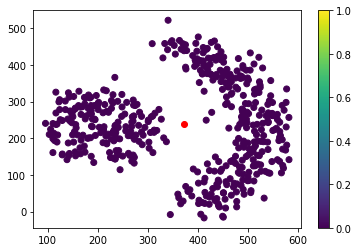

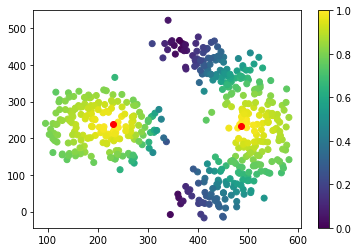

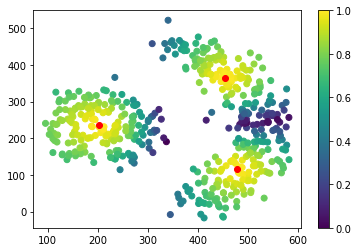

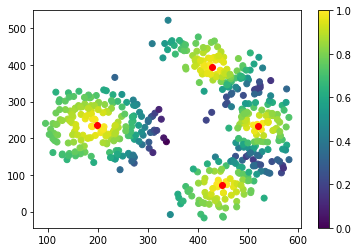

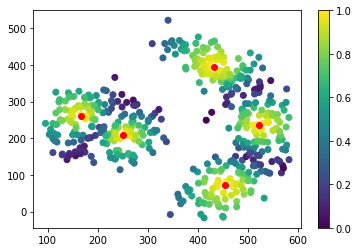

In [240]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(k_pack)):
    bels = []
    for belonging_rate in belonging_rates_ks[i]:
        bel = (np.max(belonging_rate)-np.min(belonging_rates))/(np.max(belonging_rates)-np.min(belonging_rates))
        bels.append(bel)
    plt.scatter(node_set[:,0], node_set[:,1] , c=bels)
    for center in k_pack[i][1]:
        plt.scatter(center[0], center[1] , color='red')
    plt.colorbar()
    plt.show()


In [241]:
def cal_cost(node_set, centroid_nodes, belonging_rates):
    J = 0
    for j in range(len(node_set)):
        for i in range(len(centroid_nodes)):
            J += math.pow(belonging_rates[j][i], m)*np.linalg.norm(node_set[j] - centroid_nodes[i])
    return J

In [242]:
Js = []
for i in range(len(k_pack)):
    Js.append(cal_cost(k_pack[i][0], k_pack[i][1], belonging_rates_ks[i]))
print(Js)

[86418.60594764823, 40431.002025692826, 26809.00113824313, 21008.864849717214, 16833.71585573441]


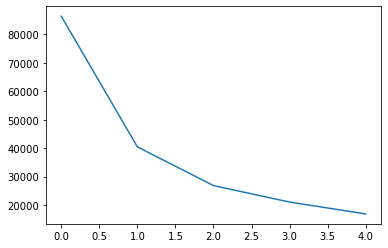

In [243]:
plt.plot(Js)
plt.show()
